In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 - Data Cleaning

In [8]:
df= pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.shape

(1460, 81)

In [11]:
df.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
a=dict()
for col in df:
    a[col]= df[col].isnull().sum()/len(df[col])*100  #percentage of missing values in a feature.

In [13]:
# prints features which have more than 40% missing values
for key,value in a.items():
    if a[key]>=40:
        print(key,value)

Alley 93.76712328767123
FireplaceQu 47.26027397260274
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


In [14]:
# Features having more than 40% of it as missing values cant even imputed correctly.
#So they will not to predict the target feature correctly. Hence we drop these features from our dataframe.
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns',inplace=True)

##  Correlaion matrix

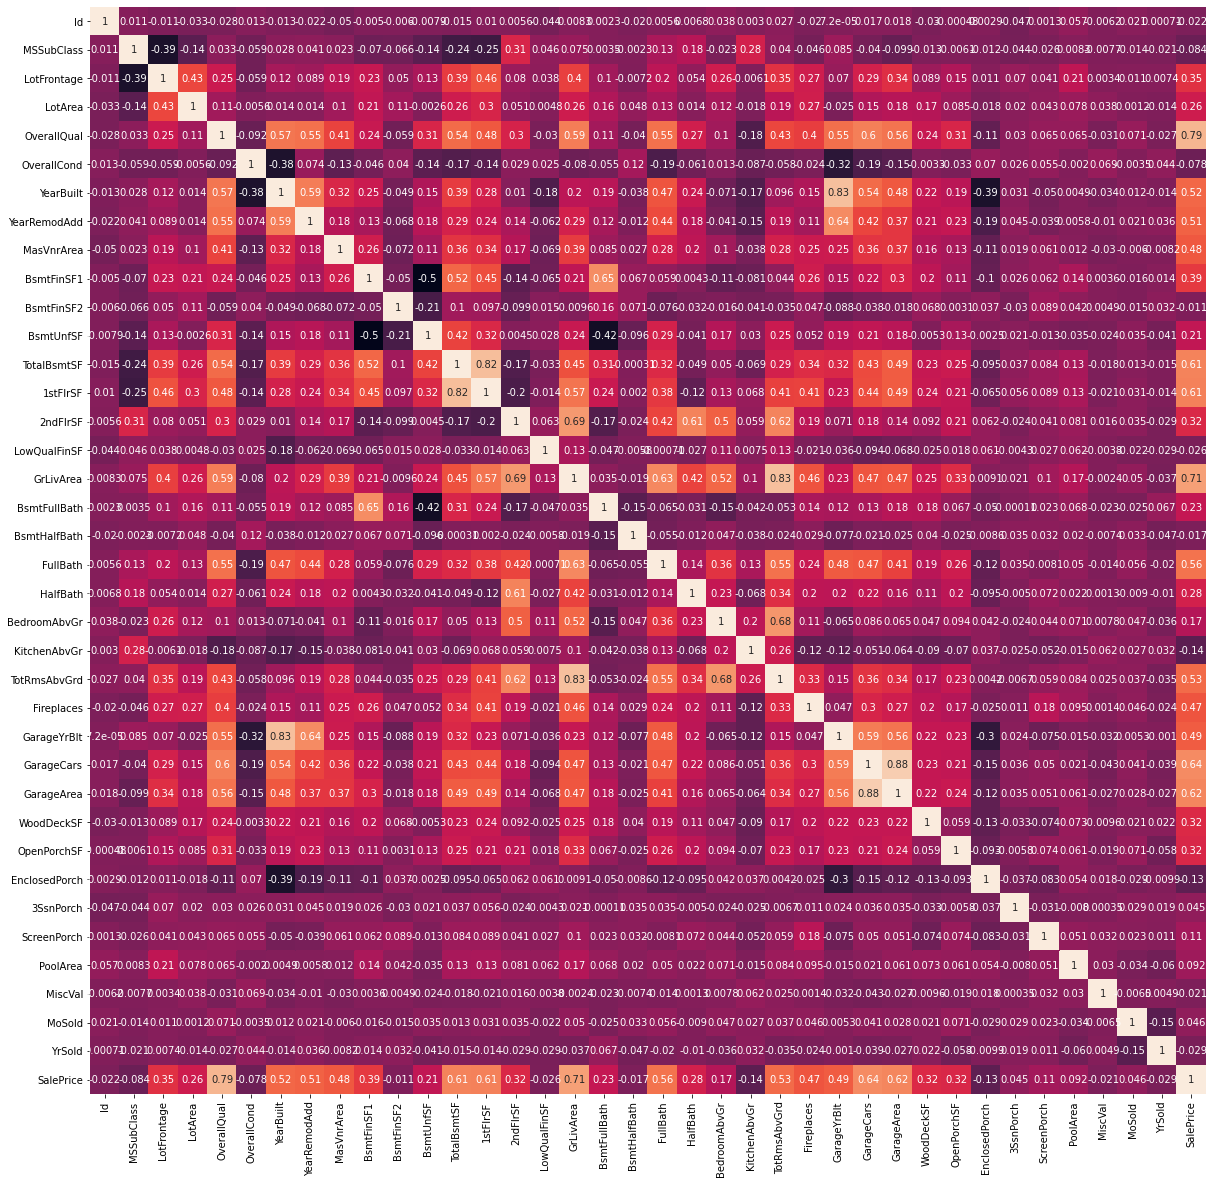

In [15]:
fig ,ax = plt.subplots(figsize=(20,20))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True, cbar = False)
plt.show()

In [16]:
'''Highly correlated features do almost the same in prediction.
Hence we can drop correlated features and take only one of the correlated one, as they will not help as such in betterment of prediction
but will increase the time and complexity to build ml model'''
df.drop(['TotalBsmtSF','1stFlrSF','GrLivArea','MSSubClass','GarageCars','GarageArea','OverallCond','EnclosedPorch'],axis='columns',inplace=True)

In [17]:
print(df.columns)

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleC

<AxesSubplot:>

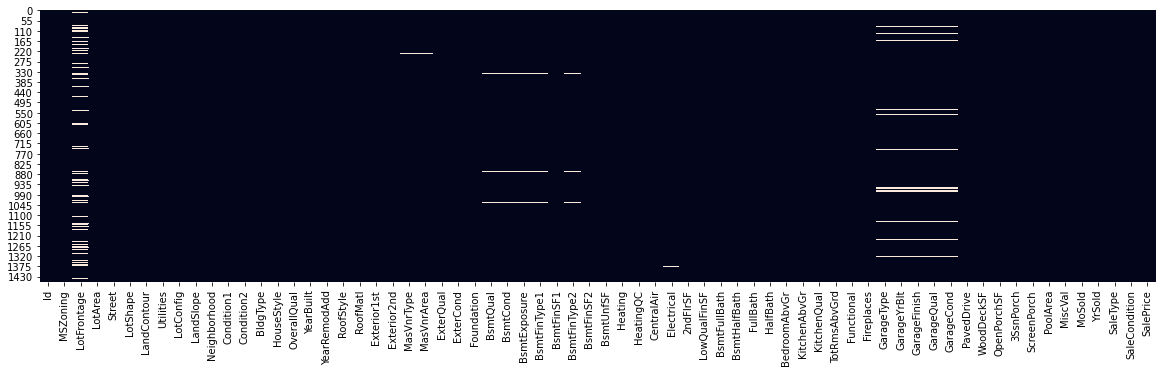

In [18]:
fig,ax= plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [19]:
#'LotFrontage' feature also have too many missing values. Therefore we drop it.
df.drop(['LotFrontage'],axis='columns',inplace=True)

<AxesSubplot:>

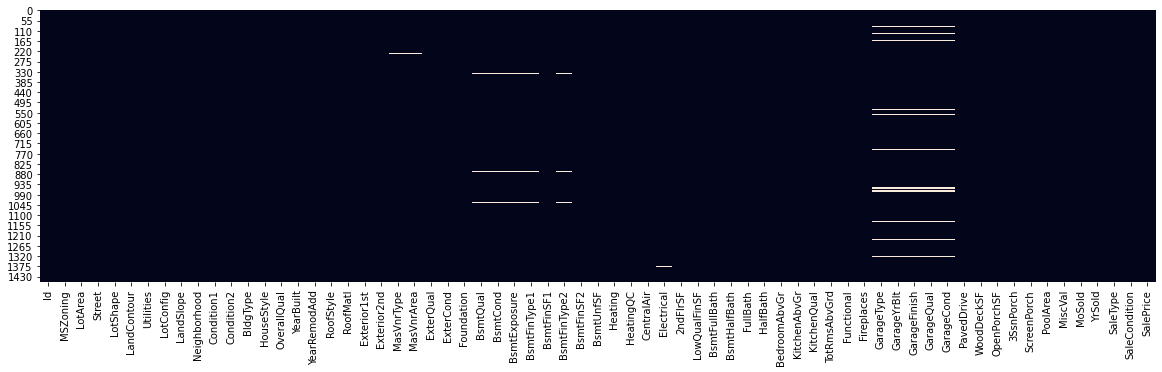

In [20]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [21]:
# Output have the features with null values
for col in df:
    if df[col].isnull().sum()!=0:
        print(col)

MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [22]:
md=df['MasVnrType'].mode()
df['MasVnrType'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [23]:
df['MasVnrArea'].fillna(df["MasVnrArea"].mean(),inplace=True)    #filled null vlue with mean beacuse feature is numerical,continuous

In [24]:
md=df['BsmtQual'].mode()
df['BsmtQual'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [25]:
md=df['BsmtCond'].mode()
df['BsmtCond'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [26]:
md=df['BsmtExposure'].mode()
df['BsmtExposure'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [27]:
md=df['BsmtFinType1'].mode()
df['BsmtFinType1'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [28]:
md=df['BsmtFinType2'].mode()
df['BsmtFinType2'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [29]:
md=df['Electrical'].mode()
df['Electrical'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [30]:
md=df['GarageType'].mode()
df['GarageType'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [31]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)    #filled null vlue with mode beacuse feature is numeical and discontinous

In [32]:
md=df['GarageFinish'].mode()
df['GarageFinish'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [33]:
md=df['GarageQual'].mode()
df['GarageQual'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

In [34]:
md=df['GarageCond'].mode()
df['GarageCond'].fillna(md[0],inplace=True)    #filled null vlue with mode beacuse feature is categorical

<AxesSubplot:>

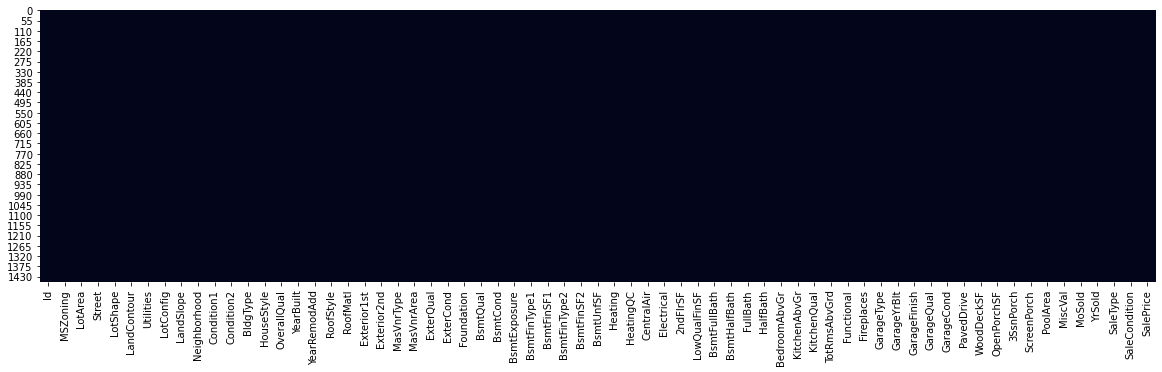

In [35]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [36]:
df.to_csv(r'C:\Users\shrik\kaggle\Houseprices\house-prices-advanced-regression-techniques\HousePred_cleaned_train.csv')

## Part 2- Random Forest Model Implementation

In [37]:
df= pd.read_csv('C:/Users/shrik/kaggle/Houseprices/house-prices-advanced-regression-techniques/Housepred_cleaned_train.csv')

In [38]:
df.head()

,Unnamed: 0,Id,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
df.drop(['Unnamed: 0','Id'],axis='columns',inplace=True)

In [40]:
df.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,35,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
d = df.drop(['SalePrice'],axis="columns")

In [43]:
d.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,2,2008,WD,Normal
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,5,2007,WD,Normal
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,9,2008,WD,Normal
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,35,0,0,0,0,2,2006,WD,Abnorml
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,12,2008,WD,Normal


In [44]:
d = pd.get_dummies(d)

In [45]:
d.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706,0,150,854,0,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,0.0,978,0,284,0,0,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,162.0,486,0,434,866,0,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,0.0,216,0,540,756,0,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,350.0,655,0,490,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
X, Y = d, df['SalePrice']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [50]:
# fit the regressor with x and y data (train data)
regressor.fit(X, Y)  

RandomForestRegressor(random_state=42)

In [51]:
# Actual class predictions
rf_predictions = regressor.predict(X_test)

In [52]:
rf_predictions

array([130093.2 , 141143.5 , 139863.  , 184189.11, 102490.75, 113038.16,
       107365.55, 148707.5 , 228631.92, 192501.  , 288444.35, 136431.5 ,
       288027.52, 119045.55, 191786.47, 201617.  , 152975.  , 122475.68,
        63107.72, 209098.9 , 169796.82, 116941.93, 164997.32, 153157.5 ,
       317568.15, 150516.82,  89560.  , 131897.5 , 145171.  , 227187.2 ,
       112172.  , 177538.79, 170178.5 ,  83328.93,  88182.08, 116176.8 ,
       124859.55, 117920.71, 260789.3 , 184693.87, 125309.  , 278912.63,
       129479.2 , 361782.62, 232574.07, 118241.  , 269704.45, 203275.3 ,
       184179.32, 129578.  , 150037.37,  89501.5 , 141128.  , 153541.75,
       143190.25, 143284.87, 116145.  , 266538.03, 120514.67, 111086.61,
       218629.  , 205425.  , 139066.  , 132475.1 , 257764.06, 146068.05,
       166060.  , 203101.5 , 141651.  , 258971.77, 130890.04, 101576.5 ,
       177108.14, 170854.29, 107058.5 , 162972.83, 138520.59, 175363.8 ,
       110042.14, 439909.36, 305429.22, 300900.58, 

In [53]:
print(regressor.score(X_test,Y_test))

0.9709170196504303


In [54]:
import sklearn.metrics as skmetrics

In [55]:
import math

In [56]:
mse = skmetrics.mean_squared_error(Y_test,rf_predictions)

In [57]:
rmse = math.sqrt(mse)
rmse

13870.816417477716